In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Adımlar :

* İmport işlemleri , dosya okuma .
* sanity check of data. (doğruluk kontrolü)
* EDA -> exploratory data analysis
* Missing Value treatments
* Outliers treatments
* Duplicate & Garbage value treatment
> **eksik değer , tekrarlı değer , aykırı değer ard arda kolayca yapılıyor.** doğruluk kontrolü sayılırlar zaten.
* Normalization
* Encoding of Data


In [132]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Bu yaşam beklentisi verileri, Dünya Sağlık Örgütü'nün çeşitli sağlık ve sosyoekonomik göstergeleri içeren sütunlarını temsil ediyor. Sütunların anlamları şu şekildedir:

1. **Country**: Ülkenin adı. (Örneğin: Afganistan)
2. **Year**: Verilerin toplandığı yıl. (Örneğin: 2015)
3. **Status**: Ülkenin gelişmişlik durumu. "Developing" (gelişmekte olan) veya "Developed" (gelişmiş) olarak sınıflandırılabilir.
4. **Life expectancy**: Doğumda beklenen yaşam süresi (yıl olarak).
5. **Adult Mortality**: 15-60 yaş arası her 1000 yetişkin için ölüm oranı.
6. **infant deaths**: 1 yaşından küçük bebek ölümleri sayısı.
7. **Alcohol**: Kişi başına yıllık alkol tüketimi (litre cinsinden).
8. **percentage expenditure**: Sağlık harcamalarının ülke çapında toplam harcamalardaki yüzdesi.
9. **Hepatitis B**: Hepatit B aşısı olan 1 yaşındaki çocukların yüzdesi.
10. **Measles**: Yılda bildirilen kızamık vakası sayısı (nüfusa göre).
11. **BMI**: Ortalama vücut kitle indeksi (BMI).
12. **under-five deaths**: 5 yaş altı çocuk ölümleri sayısı.
13. **Polio**: Polio (çocuk felci) aşısı olan 1 yaşındaki çocukların yüzdesi.
14. **Total expenditure**: Gayri safi yurtiçi hasıladan (GSYİH) sağlığa ayrılan toplam harcama yüzdesi.
15. **Diphtheria**: Difteri aşısı olan 1 yaşındaki çocukların yüzdesi (genellikle aynı yüzdelik Polio ve Hepatitis B ile ilişkilidir).
16. **HIV/AIDS**: HIV/AIDS'den ölüm oranı.
17. **GDP**: Kişi başına düşen gayri safi yurtiçi hasıla (GSYİH), dolar cinsinden.
18. **Population**: Ülkenin toplam nüfusu.
19. **thinness 1-19 years**: 1-19 yaş arası nüfusta zayıflık oranı.
20. **thinness 5-9 years**: 5-9 yaş arası çocuklar arasında zayıflık oranı.
21. **Income composition of resources**: Gelir düzeyi ve kaynakların eşit dağılımını gösteren bir endeks (1'e yakın olması daha iyi).
22. **Schooling**: Ortalama eğitim süresi (yıl olarak).

Bu sütunlar, bir ülkenin sağlık durumu ve sosyoekonomik gelişmişlik düzeyi ile ilgili önemli göstergeler sunar. Bu veriler üzerinde yapılacak analizler, yaşam beklentisi üzerindeki farklı faktörlerin etkilerini ortaya koyabilir.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [21]:
print(df[["Country"]].value_counts(),"\n--------------\n") ; print("--------------\n",df[["Status"]].value_counts())

Country              
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Palau                     1
Niue                      1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64 
--------------

--------------
 Status    
Developing    2426
Developed      512
Name: count, dtype: int64


In [24]:
#find missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

missing value lerin yüzdesini de öğrenmek istiyorum.

In [36]:
eksik_yuzde  = (df.isna().sum() / df.count()) * 100 

#df.shape[0] ile df.count() aynı sonucu verir.

eksik_df = pd.DataFrame(eksik_yuzde, columns=["Eksik Değer Yüzdesi"])

In [33]:
eksik_df

,Eksik Değer Yüzdesi
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.341530
Adult Mortality,0.341530
infant deaths,0.000000
Alcohol,7.069971
percentage expenditure,0.000000
Hepatitis B,23.186583
Measles,0.000000


alttaki hücre biraz kopyala yapıştır eksik değerleri ortalama ile dolduruyor kısaca ama benim bildiğim yolla değil sklearn yardımıyla doldurmuş. kaggle notebook da denk geldim güzel bence.

In [60]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
# imputer nesnesi oluşturmuş sonra elimdeki verileri bu nesneye uygun hale getirip dönüştürüyorum. Basit aslında.

df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [61]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

eksik değerlerle farklı yollarla başa çıkmaya çalışabiliriz. bunlardan biri "SimpleImputer" bu gayet basit çünkü zaten en basit şekilde yaptığım mean veya median gibi değerlerle boşlukları dolduruyor. fillna(mean) gibi aynı.

KNNImputer gibi daha farklı çözümler de düşünebilirim tabii ki .

In [62]:
# find duplicates
print(df.duplicated().sum())
df[df.duplicated()]

0


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


####  garbage values tespti etmek
Eğer object veri tipine sahip bir özellik varsa elinde muhtemelen saçma sapan değerleri içeriyordur. ilk ipucu bu olaiblir.

yukarıda aslında object tipindeki kolonları inceledim ancak aynı şeyi bir for döngüsüyle daha efektif yapabilirim ve ayrı bir başlık altında yapmak bu aşamanın önemini anlamak için iyi olacak.

In [63]:
for i in df.select_dtypes(include=["object"]).columns :
    print(df[i].value_counts())
    print("---"*13)

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
---------------------------------------
Status
Developing    2426
Developed      512
Name: count, dtype: int64
---------------------------------------


yukarıda value_counts sonucunda anlamsız bir alt kategori görürsen o değere sahip olan satırları silebilirsin veya değiştirebilirsin.

Örnek : Status altında "yatıyor" gibi bir şey görmeyi beklemiyorsan çöp sayılır.

Buraya kadar verileri genel bir kontrol etmiş olduk. Bİraz daha derinlemesine incelemeye keşifçi veri analizi deniyor.

## EDA

* istatistiksel değerlere bakılır.
* bu değerler görselleştirilebilir.
* özelliklerin birbirlerinegöre istatatistiksel değerleri karşılaştırılabilir.
* özelliklerin birbirleriyle ilişkileri incelenir. istenirse Görselleştirilebilir

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [65]:
df.describe(include = "object").T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


bundan sonra görselleştirme kodu eğlenceli ve güzel yapıyor..

korelasyon ile başlıyorum.

In [73]:
df.select_dtypes(include=["int","float"]).corr().head()
# bu kadarı yeterli ama görsel olunca daha güzel oluyor işte.

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546


In [85]:
import warnings
warnings.filterwarnings("ignore")

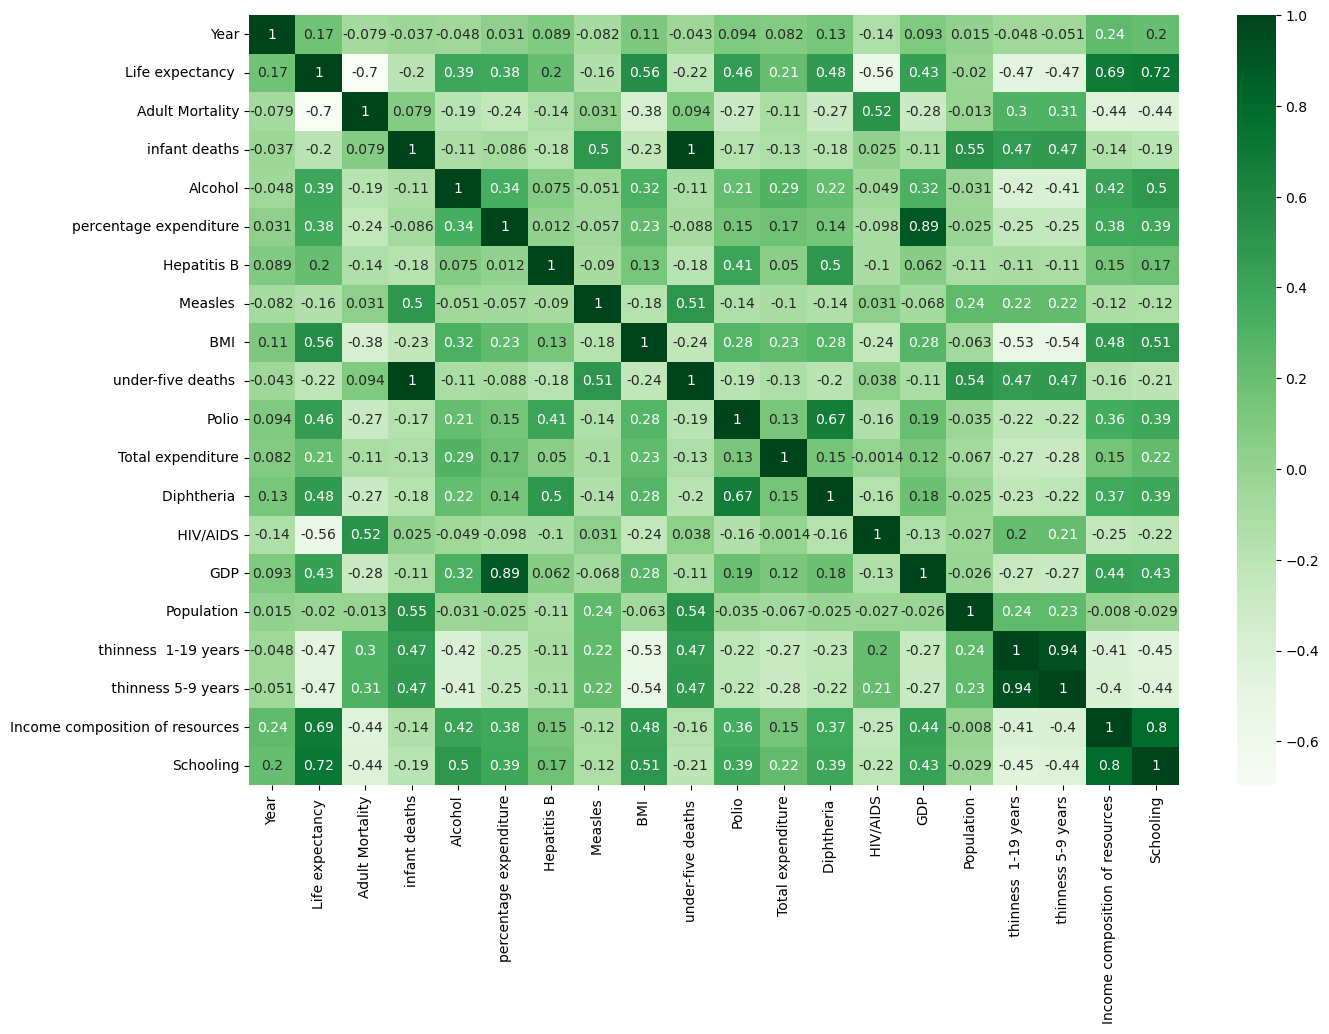

In [70]:
plt.figure(figsize=(15,10))

sns.heatmap(df.select_dtypes(include=["int","float"]).corr(),annot=True,cmap='Greens')
plt.show()

In [79]:
# dağılımı anlamak için histogram kullanılır.

# aşağıdaki hücreyi çalıştırarak 20 adet histogram grafiği elde edebilim. 
# Tamamen iş olsun d,ye yaptım öyle 50 tane grafik çizince b,şey olmuyor sonuçta.

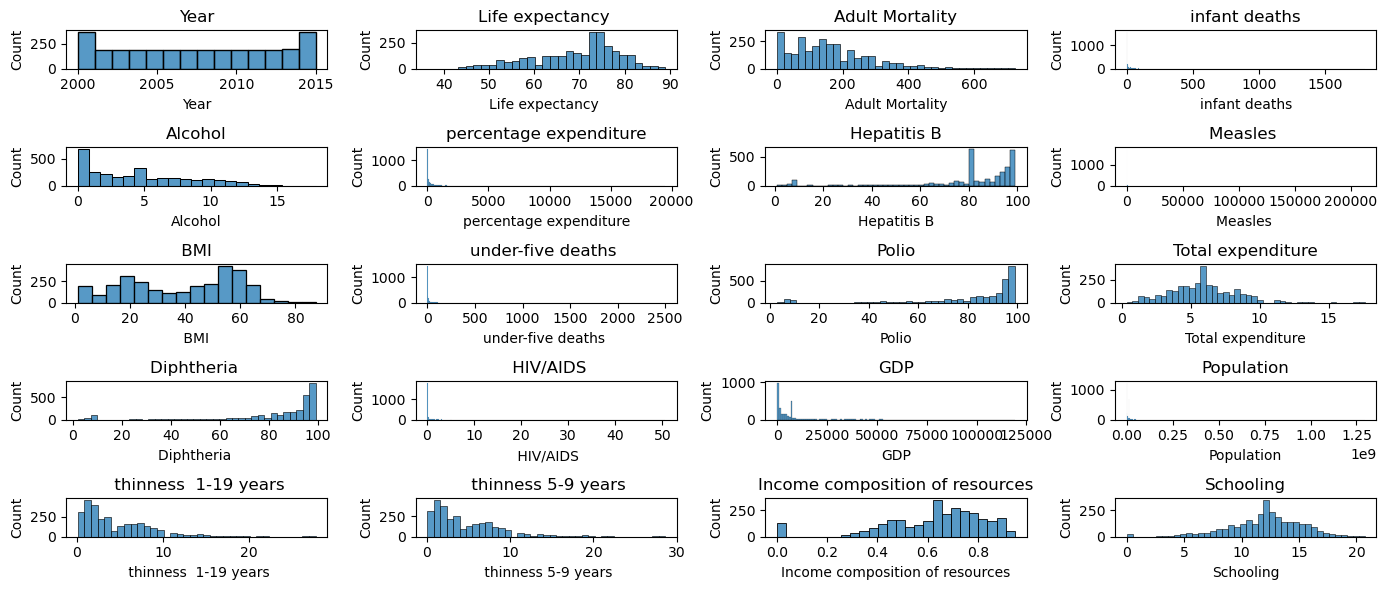

In [81]:
# # Sayısal sütunları seçiyoruz
# numeric_columns = df.select_dtypes(include="number").columns

# # Grafiklerin düzeni için alt grafikler oluştur
# fig, ax = plt.subplots(5, 4, figsize=(14, 6))  # 1 satır, 2 sütun

# # Alt grafikler üzerinde histogramları çizmek için sayaç
# n = 0


# # Histogramları her bir eksene yerleştiriyoruz
# for i in numeric_columns:
#     row = n // 4  # Satır sayısını belirlemek için
#     col = n % 4   # Sütun sayısını belirlemek için
#     sns.histplot(data=df, x=i, ax=ax[row, col])  # Her bir eksene histogram çiz
#     ax[row, col].set_title(i)  # Başlık olarak sütun ismini ekliyoruz
#     n += 1
    
# # Boş alanları düzenli hale getirmek için
# plt.tight_layout()

# # Grafiği gösteriyoruz
# plt.show()

In [83]:
# Outlier değerleri tespit etmek için boplot kullanılır.
# boxenplot da var o da güzel.

In [87]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<Axes: xlabel='GDP'>

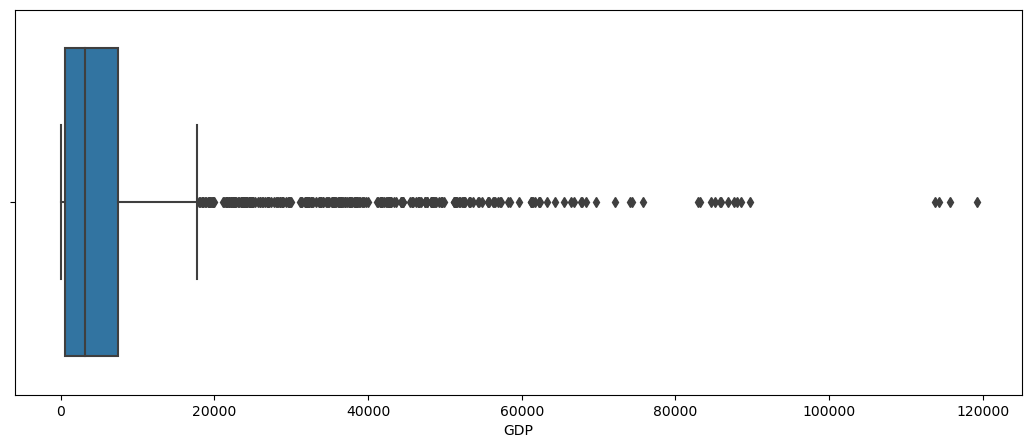

In [104]:
plt.figure(figsize=(13,5))
sns.boxplot(data = df , x = "GDP")

bu veri seti için çoğu özellik outlier içeriyor.

<Axes: xlabel='GDP'>

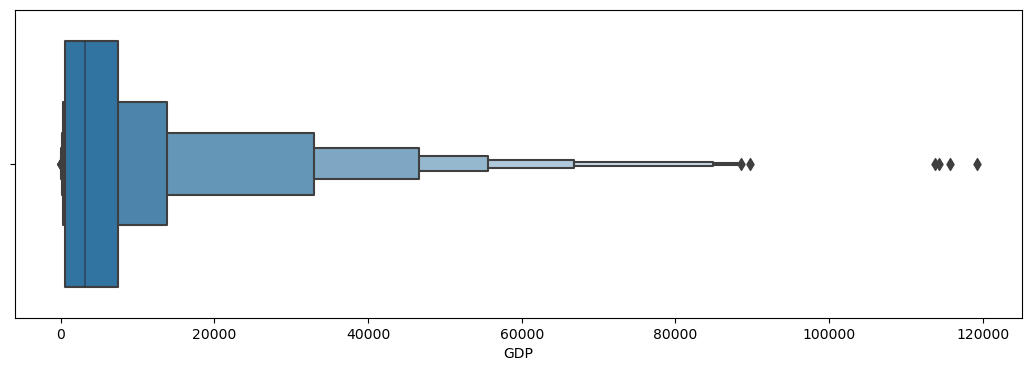

In [105]:
plt.figure(figsize=(13,4))
sns.boxenplot(data = df , x = "GDP") # ortalamayı öne çıkarıyor.

<Axes: xlabel='GDP'>

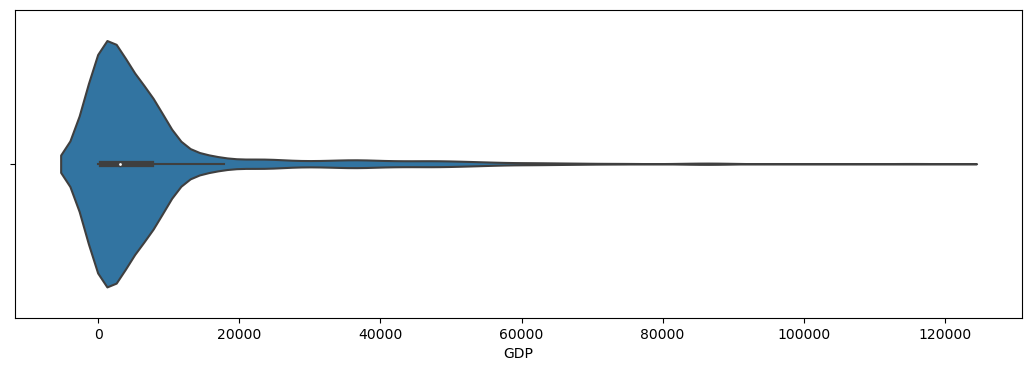

In [106]:
plt.figure(figsize=(13,4))
sns.violinplot(data = df , x = "GDP") # ortalamayı öne çıkarıyor.

In [ ]:
# iki sayısal değişken arasındaki ilişkiyi  görselleştirmek için scatterplot kullanılır.

# burada plotly de kullanmak istiyorum.

In [121]:
import plotly.express as px
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [130]:
px.scatter(df,y='GDP' ,x='Life expectancy ',color='Country',size='Life expectancy ',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Adult Mortality')

<Axes: xlabel='GDP', ylabel='Schooling'>

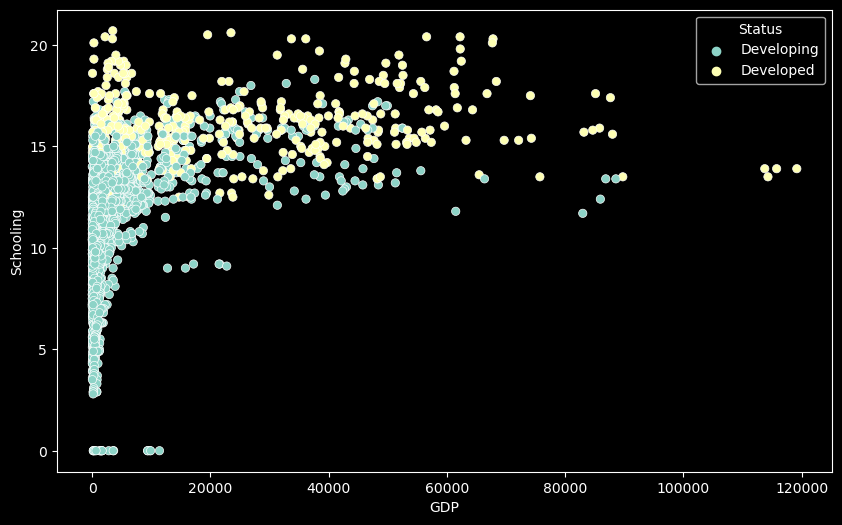

In [138]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df , x = "GDP" , y = "Schooling" ,hue = "Status" )

In [124]:
fig=px.histogram(df,x='Life expectancy ',template='plotly_dark')
fig.show()

In [109]:
# aradaki farkı görüyorsun. bir de violinplot için bakalım.

In [110]:
fig=px.violin(df,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

In [111]:
# yıllara göre life expectancy değeri nasıl değişmiş. ülkelere göre .

fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

# Outlier treatment

önemli konu  ; kategorik verilere , sayısal da olsa kategori belirten verilere , hedef değişkene outlier tespiti için bulaşmıyoruz.

sayısal olanlar bizim için önemli.

outlier değerler için bir şey yapılacak mı yoksa yapılmayacak mı buna karar vererek başlayabiliriz.

# Encoding 

OneHotEncodin ve LabelEncoding nedir bunları bilmek başlangıç için yeterli... kategorik olan değişkenlerin alt sınıflarını kodlayarak sayısal hale getiriyorum ki Makine modeline verebileyim..

In [158]:
dummy_df = pd.get_dummies(data=df , columns=["Country","Status"],drop_first=True)

normalizasyon , standardization aşamalrı da ML modeli için önemli ama o kadar ilerlemiyorum bu uygulamada amacım biraz veri görselleştirme ile birlikte data cleaning kısımlarını yapmaktı..

belki en baştan kolon isimlerini değiştirmem gerekiyordu ancak çok sonra aklıma geldi geri dönmedim. kod yazarken kaggle da bulunan farklı çalışmlardan da yararlanma pratiği oldu biraz da. 